In [78]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
from scipy.fft import fft, ifft

In [8]:
def gaussian(x, mean=0, stdev=1):
    return np.exp(-(x-mean)**2 / (2*stdev**2)) / np.sqrt(2*np.pi)


In [27]:
def wavepacket(xgrid, kgrid, mass=1.0, mean=0, stdev=1, t=0, psi_x=None):
    # omega = k^2/2m
    if psi_x == None:
        psi_x = np.zeros(len(xgrid), dtype=complex)
        

    for ki,k in enumerate(kgrid):
        disp = 1j*t*k*k/(2*mass)
        gk = gaussian(k, mean=mean, stdev=stdev)
        for xi,x in enumerate(xgrid): 
            psi_x[xi] += gk * np.exp(1j*k*x - disp)
    return psi_x/(2*np.pi) 

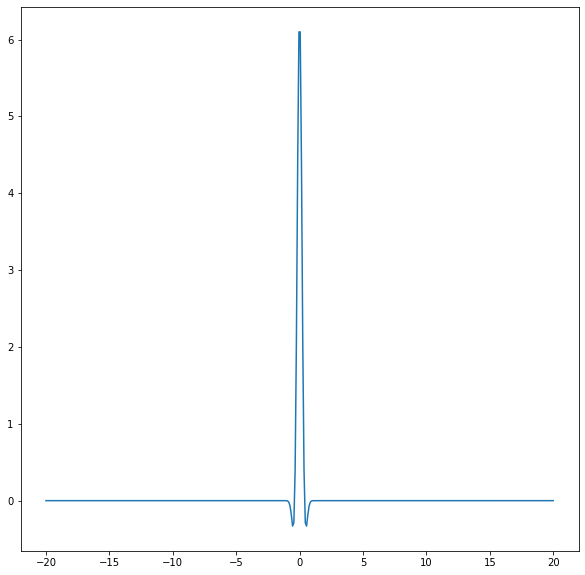

In [129]:
from IPython import display
import time

# %matplotlib notebook

x_min = -20
x_max = 20
x_nsteps = 400
tstep = 1

x_grid, x_step = np.linspace(x_min, x_max, num=x_nsteps, endpoint=True, retstep=True)
k_grid, k_step = np.linspace(x_min, x_max, num=x_nsteps, endpoint=True, retstep=True)

psi_k = cp.deepcopy(k_grid)    
psi_x = cp.deepcopy(x_grid)


    
y_vs_t = []
for ti in range(n_tsteps):
    y = wavepacket(x_grid, k_grid, t=ti*tstep, mass=10, stdev=4, mean=4)
#     norm = np.sqrt(np.real(y.conj().dot(y * np.abs(x_min-x_max)/nsteps)))
#     y = y / norm
    y_vs_t.append(y)


plt.plot(x_grid, np.real(y_vs_t[0]));


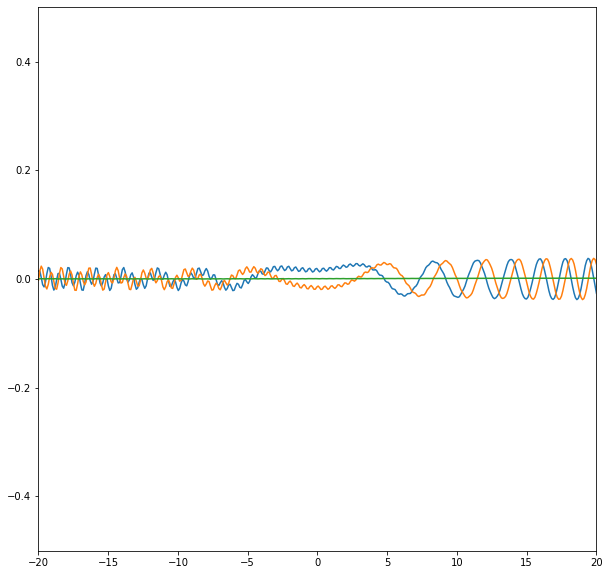

In [130]:
norm = np.sqrt(np.real(y_vs_t[0].conj().dot(y_vs_t[0] * np.abs(x_min-x_max)/nsteps)))

for y in y_vs_t:

    y = y/norm
    
    plt.plot(x_grid,np.real(y))
    plt.plot(x_grid,np.imag(y))
    plt.plot(x_grid,np.real(y.conj()*y))
    axes = plt.gca()
    axes.set_xlim([x_min,x_max])
    axes.set_ylim([-.5,.5])
    plt.show()
    display.clear_output(wait=True)
    time.sleep(.01)

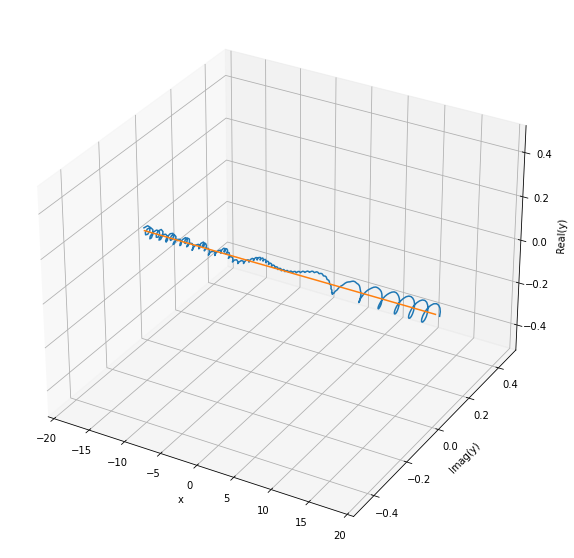

In [131]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]

for y in y_vs_t:

    y = y/norm
    ax = plt.axes(projection='3d')
    ax.plot3D(x_grid, np.imag(y), np.real(y));
    ax.plot3D(x_grid, np.zeros(len(y)), np.real(y.conj()*y));

    ax.set_xlabel('x')
    ax.set_ylabel('Imag(y)')
    ax.set_zlabel('Real(y)')
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([-.5,.5])
    ax.set_zlim([-.5,.5])

    plt.show()
    display.clear_output(wait=True)
